In [1]:
from aiml import MLModels
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Classification

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

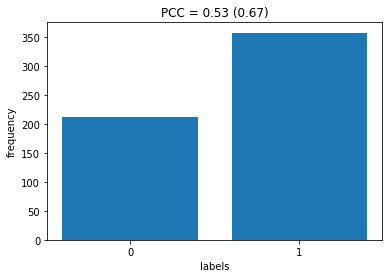

knn



SVC (L1)



SVC (L2)


,Model,Accuracy,Best Parameter,Top Predictor
0,knn,0.925059,n_neighbors = 4,None
1,SVC (L1),0.948478,C = 300,mean perimeter
2,SVC (L2),0.951991,C = 0.4,mean perimeter


In [3]:
MLModels.random_state = 10510084 # should generate the same state so we can write tests
MLModels.n_trials = 2 # Change n_trials for all models, lazy to wait so setting this to a low value
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, algorithm=['KNN', 'SVC'])

In [ ]:
type(m['KNN'])

In [ ]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)
    if k != 'KNN':
        ax.set_ylim(0.9, 1)
        ax.set_xscale('log')

In [ ]:
MLModels.summarize(m, cancer.feature_names)

### Scaling the data

In [ ]:
MLModels.n_trials = 2
m = MLModels.run_classifier(cancer.data, cancer.target, cancer.feature_names, scaler=MinMaxScaler())

## Regression

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

In [ ]:
MLModels.n_trials = 2
m = MLModels.run_regression(boston.data, boston.target, boston.feature_names)

In [ ]:
for k in m:
    ax = m[k].plot_accuracy()
    ax.set_title(k)

In [ ]:
MLModels.summarize(m, boston.feature_names)